In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose

path_to_data = '/home/fraga/Documents/Series-Temporales/Data/Index2018.csv'

In [2]:
df_comp = pd.read_csv(path_to_data)

In [3]:
# Variable fecha no incluida en describe
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
# Información inútil
df_comp.date.describe()

count           6269
unique          6269
top       27/04/2010
freq               1
Name: date, dtype: object

In [5]:
# From text to date

In [6]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [8]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [9]:
# Fecha como índice
df_comp.set_index('date', inplace = True)

In [10]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [11]:
# Ahora date es el índice
try:
    df_comp.date.describe()

except:
    print('Date ya no es una columna, es un índice')

Date ya no es una columna, es un índice


In [12]:
df_comp = df_comp.asfreq('d')

In [13]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [14]:
# Fines de semana no funciona la bolsa, usamos b para business days
df_comp = df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [16]:
# Front Filling: asignar al valor faltante el valor del periodo posterior
df_comp.spx = df_comp.spx.fillna(method = 'ffill')

df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [17]:
# Back Filling: asignar al valor faltante el valor del periodo anterior
df_comp.ftse = df_comp.ftse.fillna(method = 'bfill')
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [18]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [19]:
df_comp.nikkei = df_comp.nikkei.fillna(method = 'ffill')
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [20]:
df_comp['market_value'] = df_comp.spx

In [21]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [22]:
del df_comp['spx']

In [23]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.672753,1288.642547
std,2752.604984,1145.568370,4043.795272,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10701.130000,992.715221
50%,5774.380000,5663.300000,15030.510000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [24]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [25]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [26]:
# Preparación para machine learning
size = int(len(df_comp) * 0.8)

In [27]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [28]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [29]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## Ruido Blanco

In [30]:
wn = np.random.normal(loc = df.market_value.mean(), 
                      scale = df.market_value.std(),
                      size = len(df))

df['wn'] = wn

<ipython-input-30-df8e089a63a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [31]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1079.573206
std,292.559287,292.449182
min,438.920000,118.774743
25%,914.620000,881.668468
50%,1144.650000,1079.402546
75%,1316.280729,1274.258887
max,1570.252238,2159.290061


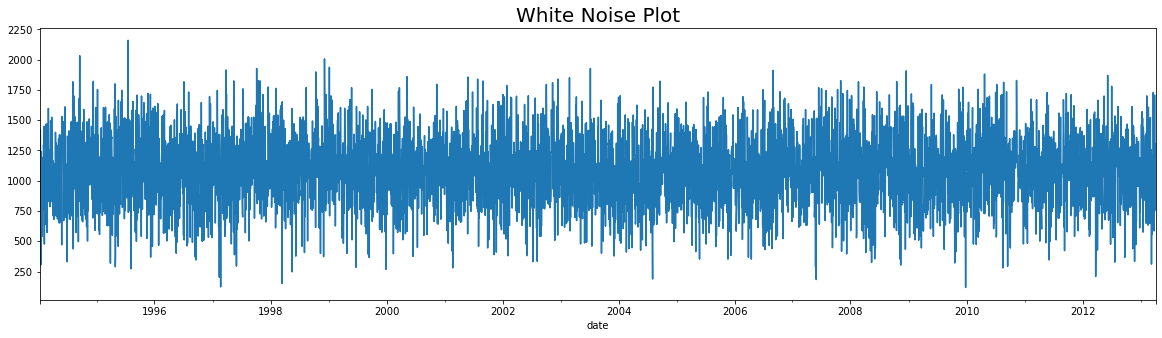

In [32]:
df.wn.plot(figsize = (20, 5))
plt.title('White Noise Plot', size = 20)
plt.show()

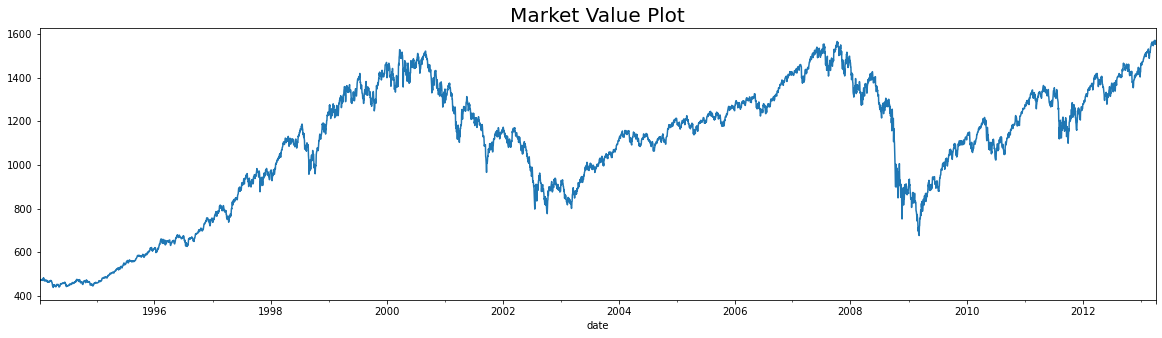

In [33]:
df.market_value.plot(figsize = (20, 5))
plt.title('Market Value Plot', size = 20)
plt.show()

In [34]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [35]:
sts.adfuller(df.wn)

(-70.82226330703025,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70804.29412904313)

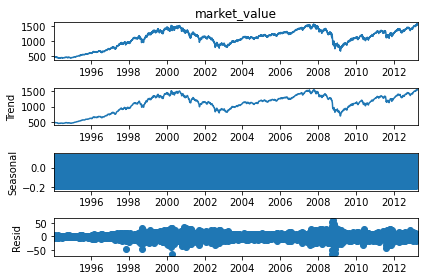

In [36]:
s_dec_additive = seasonal_decompose(df.market_value, model = 'additive')
s_dec_additive.plot()
plt.show()

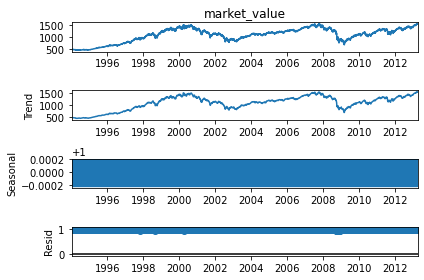

In [37]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = 'multiplicative')
s_dec_multiplicative.plot()
plt.show()

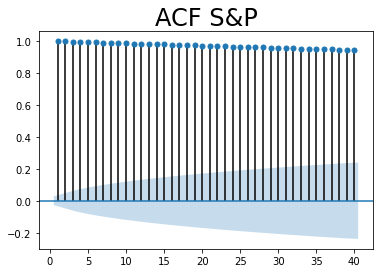

In [40]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title('ACF S&P', size = 24)
plt.show()

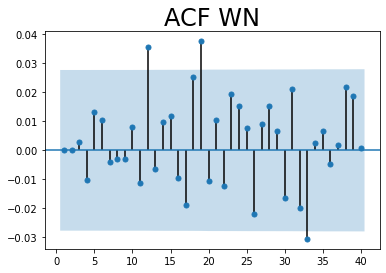

In [41]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

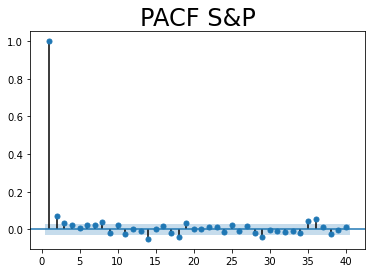

In [43]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

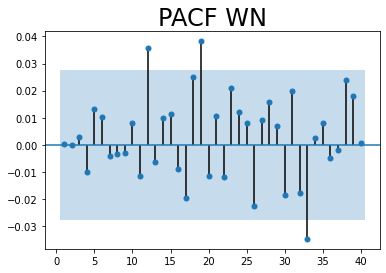

In [44]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()